In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
from matplotlib.patches import Arc

In [2]:
x = np.random.randint(0,255,(8,8))

In [3]:
x

array([[ 65,  40,  68, 135, 217,  99, 113,  81],
       [254, 142,  34, 179,  60, 209, 218,  13],
       [ 40, 154,  65,  13,  37,  95, 140,  47],
       [ 94, 118,   1,  86,  66,  88, 248,  48],
       [ 11,  18, 177, 193,  21, 237,  89, 134],
       [141, 173, 251, 214, 218, 127,  91, 159],
       [ 32,  95, 138, 178,  23, 204, 134,  87],
       [ 40,  33,  86, 143, 201,  86,  72,  20]])

In [4]:
newx = x[2:7,2:7]
newx[:,0][0:7:2]

array([ 65, 177, 138])

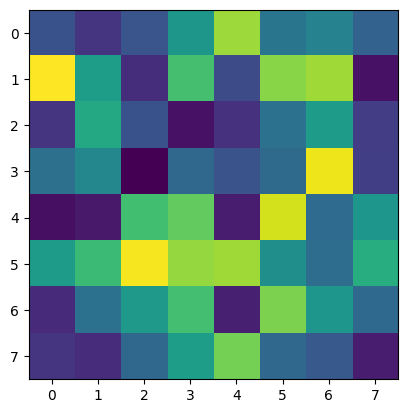

In [5]:
plt.imshow(x)

In [7]:
M = np.array([
 [1,2,3,4],
 [5,6,7,8],
 [9,10,11,12],
 [13,14,15,16]])

## Operaciones basicas.

## Multiplicación por un escalar.
b = 3
C = b * M
C


array([[ 3,  6,  9, 12],
       [15, 18, 21, 24],
       [27, 30, 33, 36],
       [39, 42, 45, 48]])

In [8]:
## Restar por otra matriz

N = np.array([
    [123,21,2,34],
    [9,10,29,10],
    [543,321,596,12],
    [12,3,4,5]
              ])
F = M - N
F

array([[-122,  -19,    1,  -30],
       [  -4,   -4,  -22,   -2],
       [-534, -311, -585,    0],
       [   1,   11,   11,   11]])

In [9]:
## Transpuesta de una matriz.

M_ = np.transpose(M)
M_

array([[ 1,  5,  9, 13],
       [ 2,  6, 10, 14],
       [ 3,  7, 11, 15],
       [ 4,  8, 12, 16]])

In [10]:
### Multiplicación de una matriz por un vector.

V = np.array([[2],
 [3],
 [4],
 [5]])

dimV = np.shape(V)
dimM = np.shape(M)
dimR = (dimM[0],dimV[1])
T = M*V

## definir el vector vació resultante de la multiplicación.

R = np.empty(dimR,dtype = float)


for i in range(dimM[0]):
  sum = 0
  column = M[i]
  for j in range(len(column)):
    sum = sum + column[j]*V[j]
  R[i] = sum

R

array([[ 40.],
       [ 96.],
       [152.],
       [208.]])

In [11]:
### Generalización del anterior proceso.


## En esta función se multiplica la matriz M, por el vector V.
def mult_vect(M,V):
  dimV = np.shape(V)
  dimM = np.shape(M)
  if dimM[1] == dimV[0]:
    dimR = (dimM[0],dimV[1])
    R = np.empty(dimR,dtype = float)
    for i in range(dimM[0]):
      sum = 0
      column = M[i]
      for j in range(len(column)):
        sum = sum + column[j]*V[j]
      R[i] = sum
    return R
  else:
    msg = "Las dimensiones no son las adecuadas, intentelo de nuevo"
    return msg

A = np.array([
    [2,3,4],
    [5,6,7],
    [8,9,10]
              ])
V2 = np.array([[1,3,6],[2,4,6]])

print(mult_vect(M,V))

print(np.matmul(M,V))



[[ 40.]
 [ 96.]
 [152.]
 [208.]]
[[ 40]
 [ 96]
 [152]
 [208]]


In [12]:
### Multiplicación de dos matrices.

A = np.array([
    [2,3,3],
    [5,6,6],
    [8,9,7],
    [9,10,11]
              ])
B = np.array([
 [1,2],
 [5,6],
 [1234,812]])


dimA = np.shape(A)
dimB = np.shape(B)
dimR2 = (dimA[0],dimB[1])
R2 = np.empty(dimR2, dtype = float)
for i in range(dimA[0]):
  colA = A[i]
  for j in range(dimB[1]):
    sum2 = 0
    rowB = B[:,j]
    for q in range(dimB[0]):
      sum2 = sum2 + colA[q]*rowB[q]
    R2[i,j] = sum2

R2



array([[ 3719.,  2458.],
       [ 7439.,  4918.],
       [ 8691.,  5754.],
       [13633.,  9010.]])

In [20]:
## Generalización del anterior codigo.

def mult_matriz(A,B):
  dimA = np.shape(A)
  dimB = np.shape(B)
  if dimA[1] == dimB[0]:
    dimR = (dimA[0],dimB[1])
    R = np.empty(dimR, dtype = float)
    for i in range(dimA[0]):
      colA = A[i]
      for j in range(dimB[1]):
        sum = 0
        rowB = B[:,j]
        for q in range(dimB[0]):
          sum = sum + colA[q]*rowB[q]
        R[i,j] = sum
    return R
  else:
    msg = "Las dimensiones no son adecuadas, intentelo de nuevo"
    return msg

print(mult_matriz(A,B))
## np.matmul saca la multiplicación de dos matrices.
print(np.matmul(A,B))


[[ 3719.  2458.]
 [ 7439.  4918.]
 [ 8691.  5754.]
 [13633.  9010.]]
[[ 3719  2458]
 [ 7439  4918]
 [ 8691  5754]
 [13633  9010]]


In [14]:
## Con numpy también podemos definir matrices.

D1 = np.asmatrix(A)
D2 = np.asmatrix(B)

## Con esta definición es mas sencilla realizar operaciones
## sobre matrices. Ello se vuelve un objeto matricial. Y se comporta como tal.

## Inversa
D1.I

matrix([[-1.18374558, -0.48409894,  0.22261484,  0.44522968],
        [ 1.02650177,  0.40636042,  0.18904594, -0.62190813],
        [ 0.02473498,  0.0459364 , -0.35689046,  0.28621908]])

In [15]:
## Traspuesta.
D1.I

matrix([[-1.18374558, -0.48409894,  0.22261484,  0.44522968],
        [ 1.02650177,  0.40636042,  0.18904594, -0.62190813],
        [ 0.02473498,  0.0459364 , -0.35689046,  0.28621908]])

In [16]:
## Producto de matrices.

D1@D2

matrix([[ 3719,  2458],
        [ 7439,  4918],
        [ 8691,  5754],
        [13633,  9010]])

In [39]:
### Está función me permite calcular la rotación de un vector.


## Está funcion recibe un vector V, y un ángulo theta.

##Cabe señalar que el angulo debe estar en grados.
def rotacion(V,theta):
  dimB = (2,1)
  dimV = np.shape(V)
  if dimV == dimB:
    theta = np.deg2rad(theta)
    R = np.array([[np.cos(theta),-1*np.sin(theta)],
                  [np.sin(theta),np.cos(theta)]])
    u = mult_matriz(R,V)
    return u
  else:
    msg = "Por favor, ingrese un vector de dimensión (2,1)"
    return msg

V5 = np.array([[1],[1]])

V5_rot = rotacion(V5,180)







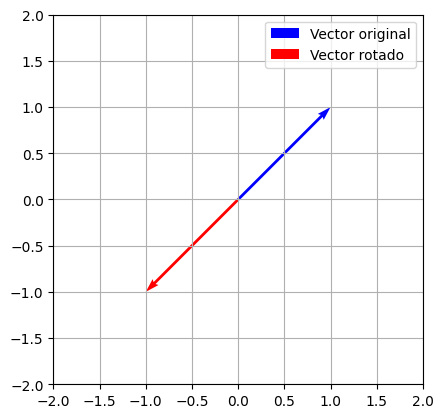

In [41]:

# Crear una figura
fig, ax = plt.subplots()

# Dibujar los vectores originales
ax.quiver(0, 0, V5[0, 0], V5[1, 0], angles='xy', scale_units='xy', scale = 1, color='blue', label='Vector original')
ax.quiver(0, 0, V5_rot[0, 0], V5_rot[1, 0], angles='xy', scale_units='xy', scale=1, color='red', label='Vector rotado')


# Configurar límites y etiquetas
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_aspect('equal', adjustable='box')
ax.legend()

# Mostrar el gráfico
plt.grid()
plt.show()